### In this assignment you will be solving N-arm bandit problem

#### You will first apply random approach and then epsilon greedy approach.

**Follow the instruction and code accordingly**

#### Run the below cell to import necessary packages

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Setup the environment

In [11]:
class Environment:
    """
    This class initilize the number of slot machines
    and define the function to perform the actions.
    """
    def __init__(self, num_arms=10):
        ### Assign number of arms (slot machines) for constructor variable
        self.num_arms = num_arms    
        
        # for each arm, save a random probability for success
        self._probs = [random.random() for _ in range(self.num_arms)] 
        
        ### assign indexes to actions
        self.action_space = range(num_arms)

    """
    define function try_arm
    attrs: arm_num: the slot machine to try on (int)
    return  reward 0 if random probability is less than the arm probabilty of success else 1
    """
    def try_arm(self, arm_num):
        # either succed or fail randomly based on the arm's probability
        got_reward = random.random() < self._probs[int(arm_num)]

        return 1.0 if got_reward else 0.0

### Define the Agent that choose random action on every trail

In [12]:
"""
Define the class RandomAgent with takes in the action_space
and try random slot machines using choose_action function
"""
class RandomAgent():
    def __init__(self,action_space):
        ### pass the action_space through constructor variable
        self.action_space = action_space

    # Choose a random action
    def choose_action(self):
        """Returns a random choice of the available actions
        return a random slot machine (int)
        """
        
        return np.random.choice(self.action_space)

### Run the below code to run trials using random approach
- The agent will run for 1000 trials
- In each trail it chooses action based on choose_action defined in RandomAgent

In [48]:
# initialize
env = Environment(20)
agent = RandomAgent(env.action_space)

random_cumulative_reward = []

total_reward = 0
for i in range(1000):
    action = agent.choose_action()
    total_reward += env.try_arm(action)
    random_cumulative_reward.append(total_reward)
    
print("Total reward after following 1000 trails using random approach {}".format(random_cumulative_reward[-1]))

Total reward after following 1000 trails using random approach 518.0


### Epsilon Greey Approach

#### Running sum formula
$Q_n(a)  = Q_{n-1}(a) + \frac{1}{N_n(a)}(R_n -  Q_{n-1}(a))$

In [14]:
"""
Define the class EpsilonGreetyAgent() which follows epsilon-greedy approach to perfrom actions
class parametrs:
action_space : number of arms (array of indexes)
epsilon: probability of being greedy
action_value: action_values of each arm initilized to zero (array)
observation_counts: number of times each arm tried so far (array)
"""
class EpsilonGreedyAgent():
    def __init__(self,action_space,epsilon=0.05):
        self.action_space = action_space
        self.epsilon = epsilon
        
        ### initilize action value as array whose size is equal to action_space and all values as zero
        self.action_values = [0.0] * len(action_space)
        
        ### initialize observation counts whose size is equal to action_space and all values as zero
        self.observation_counts = [0] * len(action_space)

    def choose_action(self):
        """Returns a random action from available actions
           if sample from np.random.uniform(0,1) less than epsilon
           else return the arm number with maximum action_value"""
        if np.random.uniform(0,1) < self.epsilon:
            #print "Making a random choice..."
            return np.random.choice(self.action_space)
        else:
            return np.argmax(self.action_values)
   
    """
    define function learn to update the observation_counts and action value
    parameters:
      action: arm number (int)
      reward: reward retun by environment (define by try_arm)
    """
    def learn(self,action,reward):
        ### Based on the action (arm number) update the corresponding observation space by one
        self.observation_counts[action] += 1
        ### retrive the the action_value of the current action
        current_val = self.action_values[action]
        step_size = 1.0 / (self.observation_counts[action])
        ### update the action_value as per the action_value function using running sum (refer the course card for the formula)
        self.action_values[action] = current_val + step_size * (reward - current_val)


### Run the below code for the agent to follow epsilon-greedy approach
- The agent will run for 1000 trials
- Based on the rewards return the action_values are updated using learn() method 


852.0


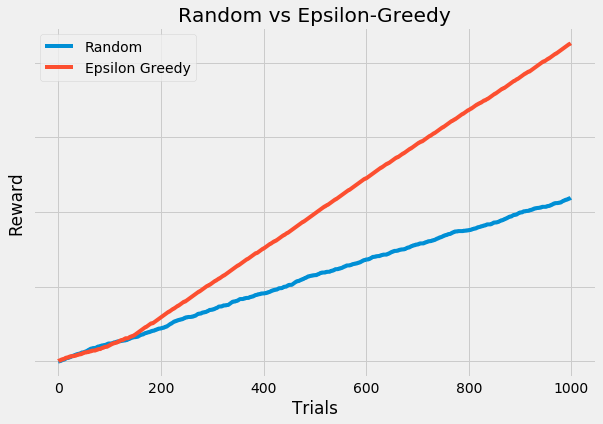

In [46]:
agent = EpsilonGreedyAgent(env.action_space,epsilon=0.07)

eps_greedy_cumulative_reward = []
total_reward = 0
for i in range(1000):
    action = agent.choose_action()
    reward = env.try_arm(action)
    agent.learn(action,reward)
    total_reward += reward
    eps_greedy_cumulative_reward.append(total_reward)


fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
y_random = random_cumulative_reward
y_epislon = eps_greedy_cumulative_reward
x = np.arange(0, 1000)
ax.set_yticklabels([])

ax.plot(x,y_random, label = 'Random')
ax.plot(x,y_epislon, label = 'Epsilon Greedy')
ax.legend()
ax.title.set_text('Random vs Epsilon-Greedy')
ax.set_xlabel('Trials')
ax.set_ylabel('Reward')

print("Total reward after following 1000 trails using epsilon-greedy approach {}".format(eps_greedy_cumulative_reward[-1]))
with open("output.txt", 'w') as file:
    file.write(str(eps_greedy_cumulative_reward[-1]))